In [64]:
from IPython.display import Image
Image(url='https://png.pngtree.com/png-vector/20220715/ourmid/pngtree-depression-man-suicide-business-businessman-png-image_5980087.png')

# Suicide Prevention:
Taking Action to Save Lives
Every year, over 700,000 people tragically lose their lives to suicide. This devastating statistic is accompanied by the alarming fact that for every suicide, there are more than 20 suicide attempts. The impact of these events extends far beyond individuals, affecting families, friends, colleagues, communities, and societies.

## Suicide is preventable. 

It is within our power to make a difference at the individual, community, and national levels. Although suicides occur globally, it is disheartening to note that 77% of global suicides take place in low- and middle-income countries.

While there is a well-established link between suicide and mental disorders, such as depression and alcohol use disorders, it is important to recognize that many suicides occur impulsively during moments of crisis. Various risk factors contribute to suicidal behavior, including experiences of loss, loneliness, discrimination, relationship break-ups, financial problems, chronic pain and illness, violence, abuse, and conflicts. Notably, a previous suicide attempt is the strongest risk factor for future attempts.

### In our efforts to prevent suicide, the World Health Organization (WHO) advocates for a comprehensive approach known as LIVE LIFE. This evidence-based approach encompasses four key interventions that have proven to be effective:

* Limiting access to the means of suicide.
* Promoting responsible reporting of suicide in the media.
* Fostering socio-emotional life skills in adolescents.
* Early identification, assessment, management, and follow-up of individuals affected by suicidal behaviors.

### Implementing these interventions requires a strong foundation built upon key pillars, including situation analysis, multisectoral collaboration, awareness raising, capacity building, financing, surveillance, monitoring, and evaluation.

### It is crucial for nations to develop comprehensive multisectoral national suicide prevention strategies based on this approach. By taking collective action and addressing this public health crisis, we can make significant strides towards reducing the prevalence of suicide and protecting vulnerable lives.

</div>

In [65]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pylab as pylab
import warnings

# Filter warnings
warnings.filterwarnings("ignore")


In [66]:
data=pd.read_csv("/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv")

In [67]:
df=data.copy()
df.dtypes
data.drop(columns=['country-year'], inplace=True)


In [68]:

# Count of categorical columns
count = [col for col in data.columns if data[col].dtype == 'object']
count_values = [data[col].nunique() for col in count]

# Print the count of categorical columns
print("Categorical Columns:")
for col, count_value in zip(count, count_values):
    print(f"- {col}: {count_value}")

# Numeric columns
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']

# Print the numeric columns
print("\nNumeric Columns:")
for col in numeric_cols:
    print(f"- {col}")



Categorical Columns:
- country: 101
- sex: 2
- age: 6
-  gdp_for_year ($) : 2321
- generation: 6

Numeric Columns:
- year
- suicides_no
- population
- suicides/100k pop
- HDI for year
- gdp_per_capita ($)


In [69]:
data.head(10)


,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,NaN,"2,156,624,900",796,Generation X


## The Human Development Index (HDI) measures each country's social and economic development by focusing on the following four factors: mean years of schooling, expected years of schooling, life expectancy at birth, and gross national income (GNI) per capita.
* a long and healthy life, as measured by life expectancy at birth;
* knowledge, as measured by mean years of schooling and expected years of schooling; and
* a decent standard of living, as measured by GNI per capita in PPP terms in US$.


## The HDI sets a minimum and a maximum for each dimension, called "goalposts", then shows where each country stands in relation to these goalposts. This is expressed as a value between 0 and 1. The higher a country's human development, the higher its HDI value.

In [70]:
num_rows, num_cols = data.shape

# Print the dimensions in a visually appealing format
print(f"DataFrame Dimensions:\nNumber of rows: {num_rows}\nNumber of columns: {num_cols}\n")

# Print the summary information of the DataFrame
print("DataFrame Summary:")
data.info()

DataFrame Dimensions:
Number of rows: 27820
Number of columns: 11

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


In [71]:
desc = data.describe().T
desc['nunique'] = data.nunique()
desc['%unique'] = desc['nunique'] / len(data) * 100
desc['null'] = data.isna().sum()
desc['type'] = data.dtypes
desc.head(60)

,count,mean,std,min,25%,50%,75%,max,nunique,%unique,null,type
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03,32,0.115025,0,int64
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04,2084,7.491014,0,int64
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07,25564,91.890726,0,int64
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02,5298,19.043853,0,float64
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01,305,1.096334,19456,float64
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05,2233,8.026600,0,int64


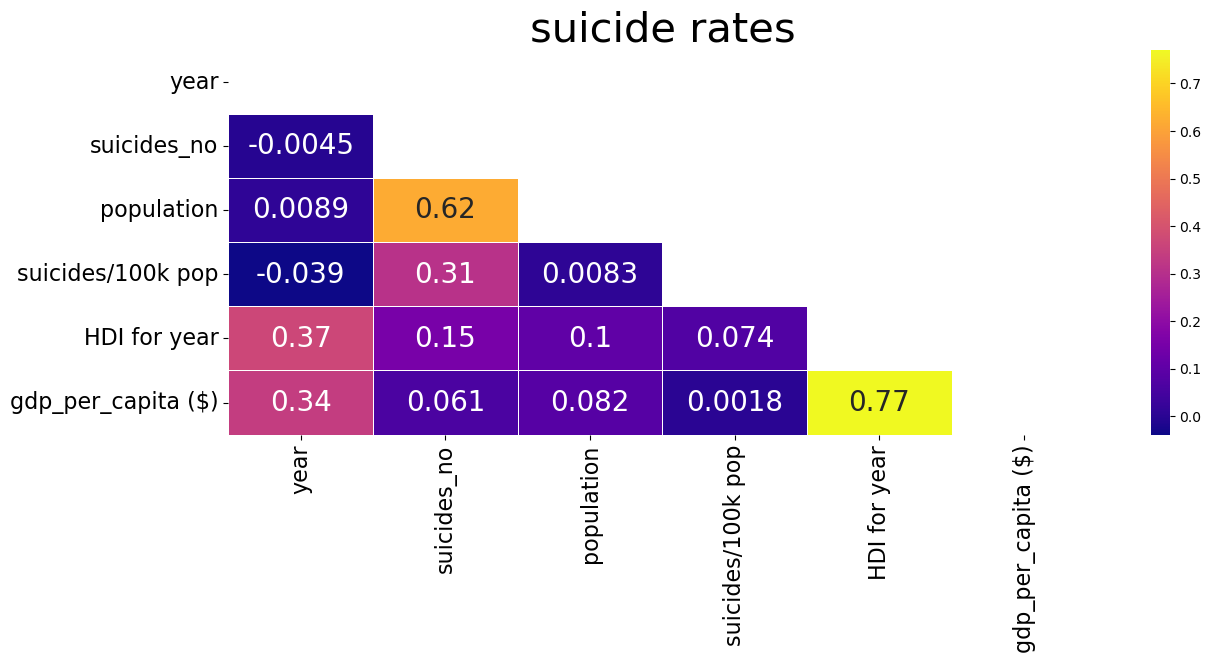

In [89]:
def heatmap(dataset, title):
    corr = dataset.corr()
    fig, axes = plt.subplots(figsize=(14, 5))

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, linewidths=0.5, mask=mask, cmap='plasma', annot=True, annot_kws={'size': 20})
    plt.title(title, fontsize=30)
    
    # Increase the size of x-tick labels
    plt.xticks(fontsize=16,rotation=90)
    
    # Increase the size of y-tick labels
    plt.yticks(fontsize=16)
    
    plt.show()

heatmap(data, 'suicide rates')


#### Based on the correlation matrix provided, we can draw the following insights:

* Suicides and Population: There is a positive correlation (0.616) between the number of suicides and the population. This suggests that countries with larger populations may have higher suicide numbers. However, it's important to note that correlation does not imply causation, and other factors may contribute to this relationship.

* Suicides and HDI for Year: There is a positive correlation (0.151) between the number of suicides and the HDI (Human Development Index) for the year. This indicates that countries with higher HDI values may have slightly higher suicide numbers. It's worth exploring the underlying factors that contribute to this correlation further.

* HDI for Year and GDP per Capita: There is a strong positive correlation (0.771) between the HDI for the year and the GDP per capita. This suggests that countries with higher GDP per capita tend to have higher HDI values. It indicates a relationship between economic development and human development.

* Year and HDI for Year: There is a moderate positive correlation (0.367) between the year and the HDI for the year. This implies that the HDI values have been gradually increasing over time. It reflects progress in various socio-economic factors associated with human development.

* Suicides/100k Pop and other Variables: The correlations between suicides/100k pop and other variables (year, suicides_no, population, gdp_per_capita) are relatively weak. The correlation coefficients are small (ranging from -0.039 to 0.074), suggesting that there is no strong linear relationship between suicides/100k pop and these variables.

# No. of suicide and suicide rate over the years

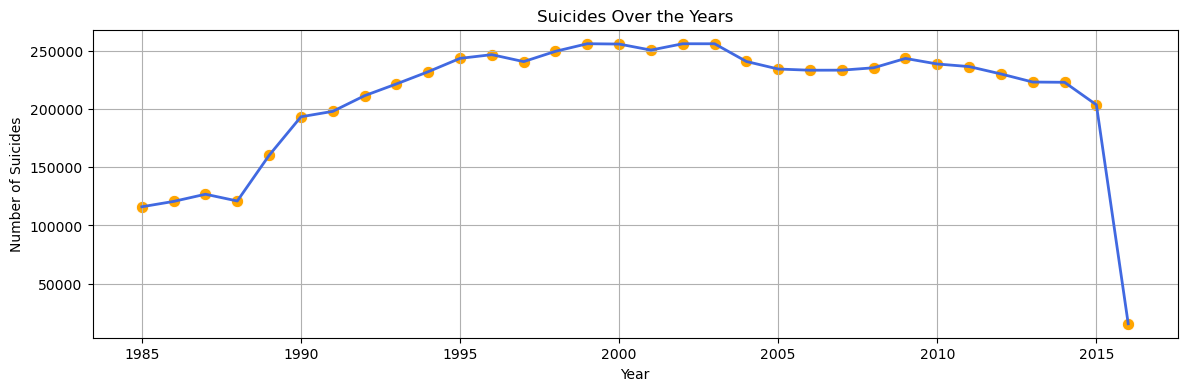

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

suicides_by_year = data.groupby('year')['suicides_no'].sum()
population_by_year = data.groupby('year')['population'].sum()
suicide_rate_by_year = (suicides_by_year / population_by_year) * 100000

plt.figure(figsize=(14, 4))
sns.lineplot(x=suicides_by_year.index, y=suicides_by_year.values, color='royalblue', linewidth=2)
sns.scatterplot(x=suicides_by_year.index, y=suicides_by_year.values, color='orange', marker='o', s=80)

plt.title('Suicides Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid(True)
plt.show()


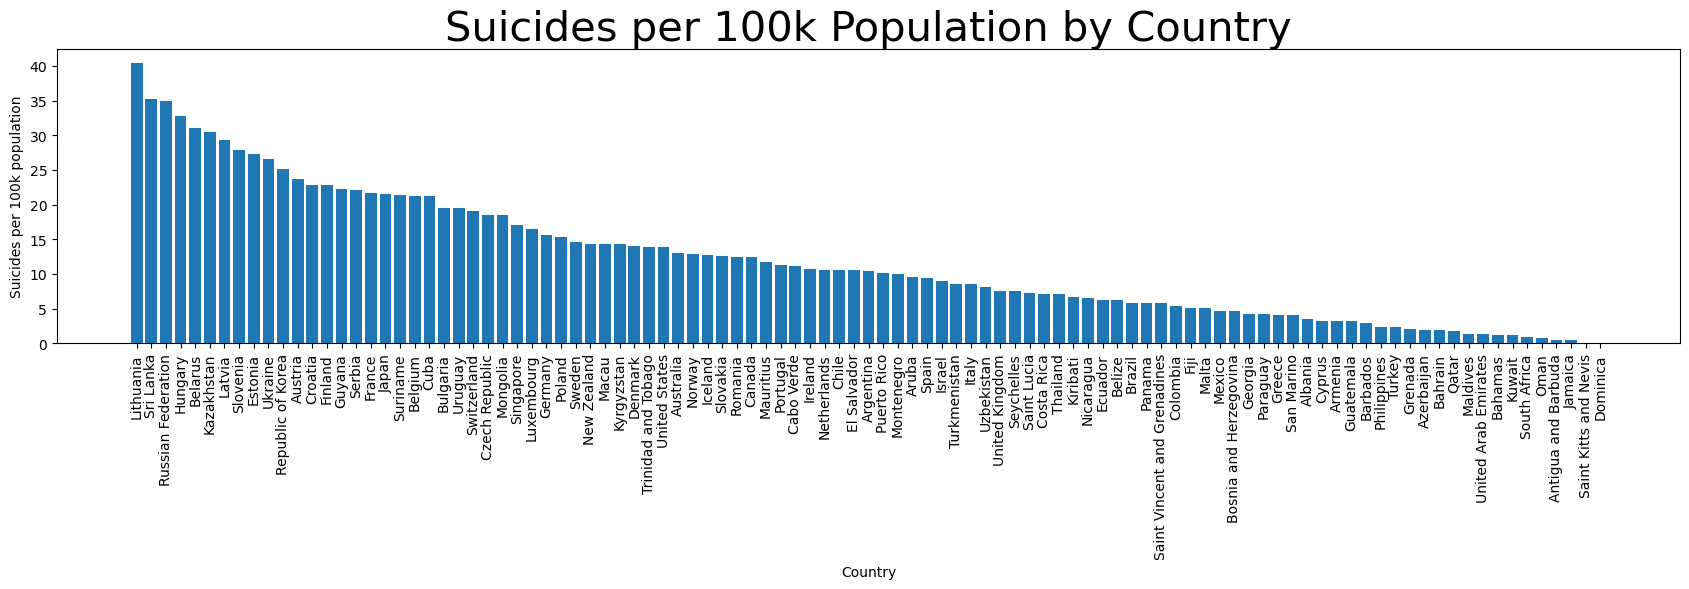

In [74]:

selected_data = data[['country', 'suicides/100k pop']]

# Group the data by country and calculate the mean of 'suicides/100k pop'
grouped_data = selected_data.groupby('country').mean()

# Sort the data in descending order based on 'suicides/100k pop'
sorted_data = grouped_data.sort_values('suicides/100k pop', ascending=False)

# Create the bar plot
plt.figure(figsize=(17, 6))
plt.bar(sorted_data.index, sorted_data['suicides/100k pop'])
plt.xlabel('Country')
plt.ylabel('Suicides per 100k population')
plt.title('Suicides per 100k Population by Country', fontsize=30)
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


# Average suicide by generation

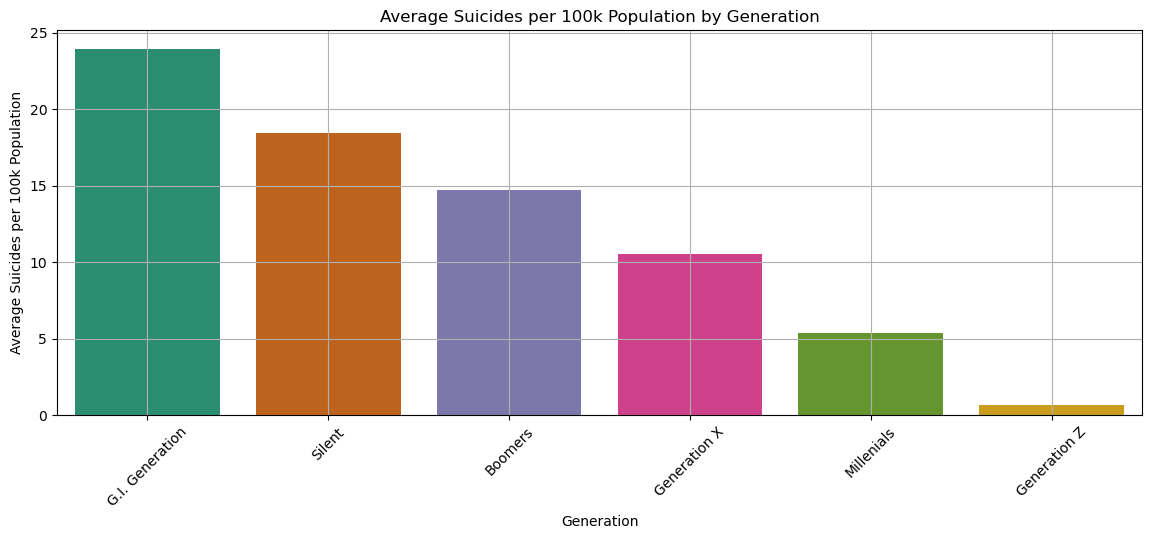

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_bar_plot(data, x, y, title, xaxis_title, yaxis_title, color=None):
    plt.figure(figsize=(14, 5))
    sns.barplot(data=data, x=x, y=y, palette=color)  # Use palette instead of color
    plt.title(title)
    plt.xlabel(xaxis_title)
    plt.ylabel(yaxis_title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

grouped_data = data.groupby('generation')['suicides/100k pop'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='suicides/100k pop', ascending=False)

color_palette = sns.color_palette('Dark2', len(grouped_data))  # Use 'Dark2' color palette

create_bar_plot(grouped_data, 'generation', 'suicides/100k pop',
                'Average Suicides per 100k Population by Generation',
                'Generation', 'Average Suicides per 100k Population',
                color=color_palette)










# Suicide ratio by  sex 

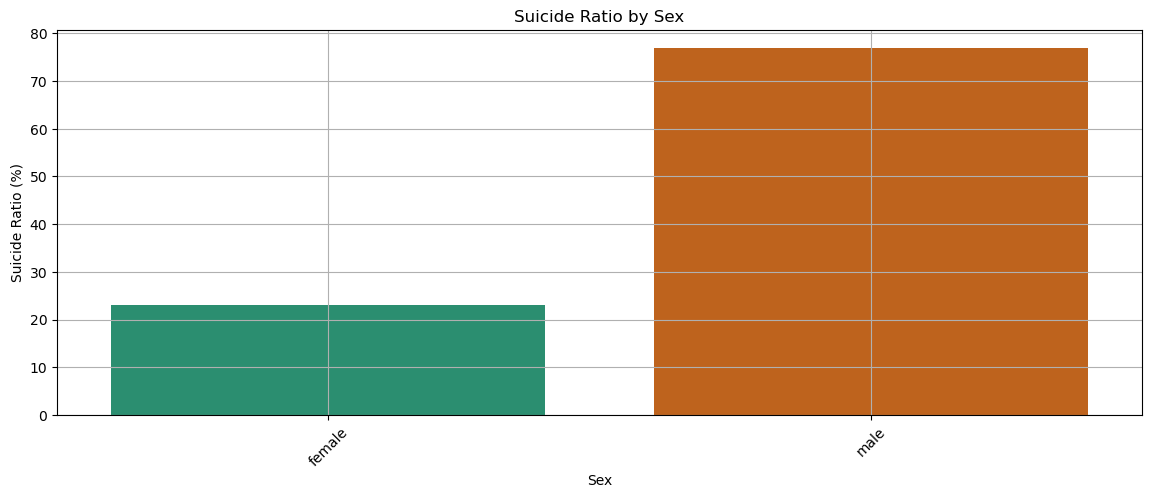

In [80]:
suicides_by_sex = data.groupby('sex')['suicides_no'].sum()
total_suicides = suicides_by_sex.sum()
suicide_ratios = (suicides_by_sex / total_suicides) * 100

color_palette = sns.color_palette('Dark2', len(grouped_data))  # Use a different color palette for the second plot

create_bar_plot(suicide_ratios.reset_index(), 'sex', 'suicides_no',
                'Suicide Ratio by Sex', 'Sex', 'Suicide Ratio (%)', color=color_palette)

# Average suicide by age groups

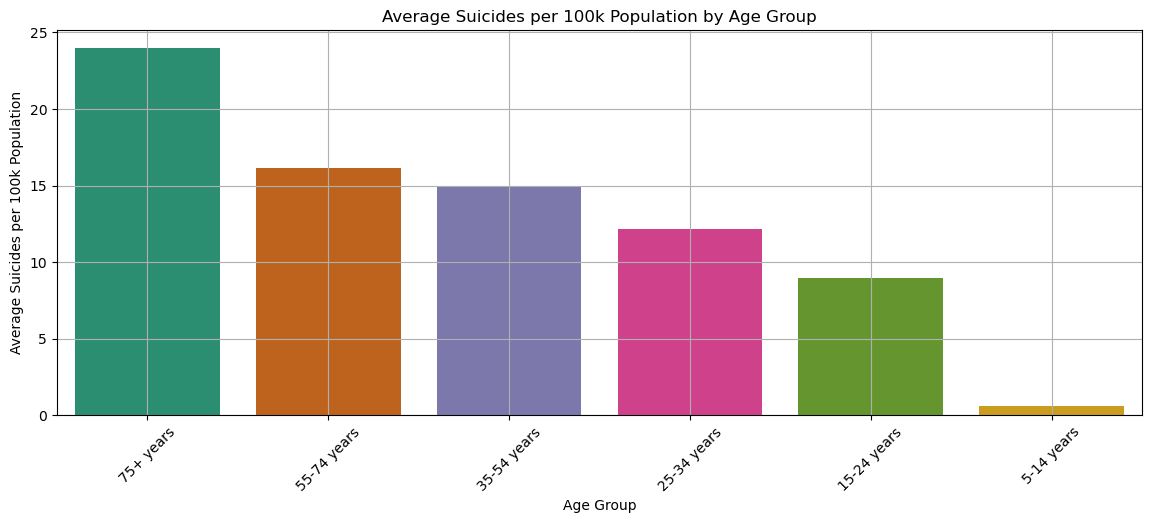

In [81]:
grouped_data = data.groupby('age')['suicides/100k pop'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='suicides/100k pop', ascending=False)
create_bar_plot(grouped_data, 'age', 'suicides/100k pop',
                'Average Suicides per 100k Population by Age Group',
                'Age Group', 'Average Suicides per 100k Population', color=color_palette)


# Suicide rate of country over the years 

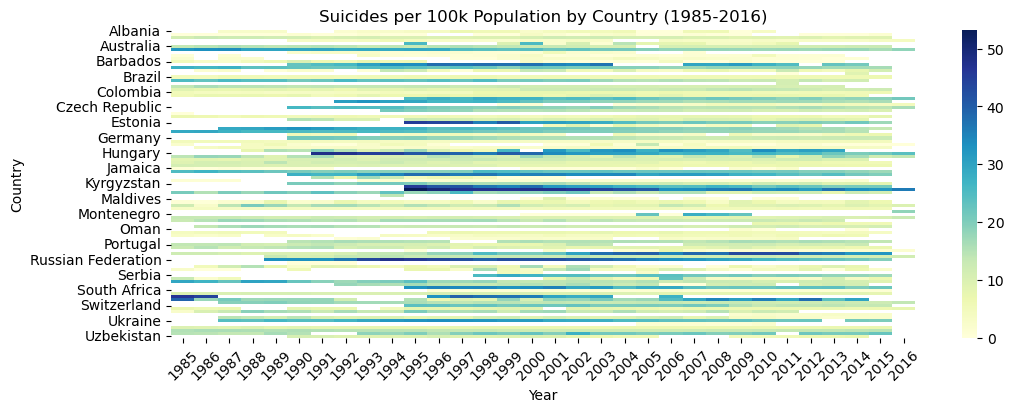

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by country and year, and calculate the average suicides/100k pop
grouped_data = data.groupby(['country', 'year'])['suicides/100k pop'].mean().reset_index()

# Pivot the data to have years as columns and countries as rows
pivot_data = grouped_data.pivot(index='country', columns='year', values='suicides/100k pop')

# Set the size of the plot
plt.figure(figsize=(12, 4))

# Plot the heatmap
sns.heatmap(pivot_data, cmap='YlGnBu')

# Set the plot title and labels
plt.title('Suicides per 100k Population by Country (1985-2016)')
plt.xlabel('Year')
plt.ylabel('Country')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()
